Name - Gajal Garg <br>
SAP ID - 500109972 <br>
Batch - 3

## Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score , roc_curve , auc

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
# checking for missing values
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [ ]:
# Removing columns with excessive missing values
df = df.drop(columns = ['Evaporation' , 'Sunshine' , 'Cloud9am' , 'Cloud3pm'])

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical features:", categorical_columns)

Categorical features: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
encoder = LabelEncoder()
for col in categorical_columns[1:8]:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0
1,2008-12-02,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0
2,2008-12-03,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0
3,2008-12-04,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0
4,2008-12-05,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0


In [ ]:
X = df.drop(columns = ['Date' , 'RainTomorrow' , 'RISK_MM'])
y = df['RainTomorrow']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)
print(f"Training set: {X_train.shape[0]} samples, Testing set: {X_test.shape[0]} samples")

Training set: 90340 samples, Testing set: 22585 samples


In [ ]:
model = LogisticRegression(multi_class = 'ovr' , solver = 'liblinear')
model.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

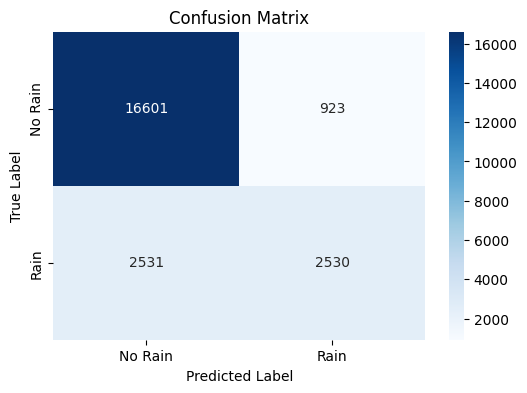

In [ ]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm , annot = True , fmt ='d' , cmap = 'Blues' , xticklabels = ['No Rain' , 'Rain'] , yticklabels = ['No Rain' , 'Rain'])
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test ,y_pred)

f1 = f1_score(y_test , y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8471
Precision: 0.7327
Recall (Sensitivity): 0.4999
F1 Score: 0.5943


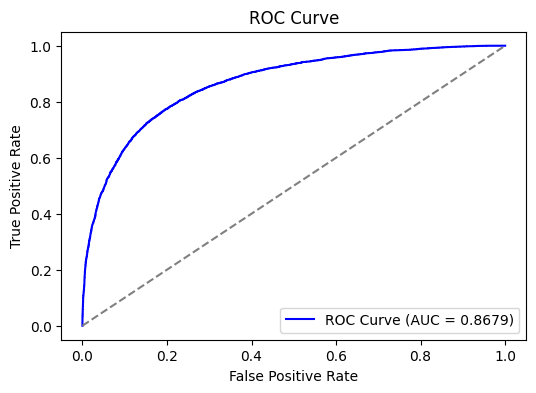

In [ ]:
# Compute ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
